## Objective 3

The third objective of this project will be to **assess whether a country has an advantage in receiving more medals if it hosts the Olympics**. This analysis will pave the way to determine what factors contribute to receiving more or less medals for the country if it hosts the Olympics.

In [1]:
import pandas as pd

hosts_df = pd.read_csv('data\\chanronnie\\host_cities.csv')
noc_df = pd.read_csv('data\\chanronnie\\noc_countries.csv')
pd.set_option('display.max_rows', None) # print the full dfs with scrolling view
pd.set_option('display.min_rows', None)

hosts_df.head(len(hosts_df))

,year,season,game,host_city
0,1896,Summer,1896 Summer Olympics,Athina
1,1900,Summer,1900 Summer Olympics,Paris
2,1904,Summer,1904 Summer Olympics,St. Louis
3,1908,Summer,1908 Summer Olympics,London
4,1912,Summer,1912 Summer Olympics,Stockholm
5,1916,Summer,1916 Summer Olympics,Berlin
6,1920,Summer,1920 Summer Olympics,Antwerpen
7,1924,Summer,1924 Summer Olympics,Paris
8,1928,Summer,1928 Summer Olympics,Amsterdam
9,1932,Summer,1932 Summer Olympics,Los Angeles


### Supplementary Data Collection 
We would like to know the host country, but our dataset only includes the host city. Fortunately wikipedia has a similar helpful table which is directly readable by pandas:

In [2]:
host_countries_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities')[0] # the first table on the page
host_countries_df.head()

,City,City.1,Country,Year,Region,Summer,Winter,Opening ceremony,Closing ceremony,Ref.
0,NaN,Athens,Greece,1896,Europe,I,NaN,6 April 1896,15 April 1896,NaN
1,NaN,Paris,France,1900,Europe,II,NaN,14 May 1900,28 October 1900,NaN
2,NaN,St. Louis[a],United States,1904,North America,III,NaN,1 July 1904,23 November 1904,NaN
3,NaN,London[b],United Kingdom,1908,Europe,IV,NaN,27 April 1908,31 October 1908,NaN
4,NaN,Stockholm,Sweden,1912,Europe,V,NaN,6 July 1912,22 July 1912,NaN


### Data Preprocessing

In [3]:
# firstly, drop the rows for any year the Games were cancelled due to a world war:
# https://en.wikipedia.org/wiki/Category:Cancelled_Olympic_Games
cancelled_years = [1916, 1940, 1944]
for cancelled_year in cancelled_years:
    hosts_df.drop(hosts_df[(hosts_df['year'] == cancelled_year)].index, inplace=True)
host_countries_df = host_countries_df[host_countries_df['Opening ceremony'].str.contains('Cancelled') == False]

# and any years in the future:
hosts_df = hosts_df[hosts_df['year'] <= 2024]
host_countries_df = host_countries_df[host_countries_df['Year'] <= 2024]

# now the two tables have the same length
assert len(hosts_df) == len(host_countries_df)
# print(len(hosts_df)) # 54, the correct number of modern games

hosts_df.sort_values(by=['year', 'season'], ascending=[True, False], inplace=True) # since summer < winter alphabetically, this sorts to chronological order
hosts_df.reset_index(inplace=True, drop=True)
host_countries_df.reset_index(inplace=True, drop=True) # these are already in chronological order

# and can be concatenated
hosts_df = pd.concat([hosts_df, host_countries_df], axis=1)

# drop the columns not relevant to analysis
keep_cols = ['year', 'season', 'City.1', 'Country', 'Region']
hosts_df = hosts_df[keep_cols]
hosts_df.head()

,year,season,City.1,Country,Region
0,1896,Summer,Athens,Greece,Europe
1,1900,Summer,Paris,France,Europe
2,1904,Summer,St. Louis[a],United States,North America
3,1908,Summer,London[b],United Kingdom,Europe
4,1912,Summer,Stockholm,Sweden,Europe


In [4]:
# remove the citations in square brackets 
for i in range(len(hosts_df)):
    if '[' in hosts_df.loc[i, 'City.1']:
        hosts_df.loc[i, 'City.1'] = hosts_df.loc[i, 'City.1'].split('[')[0]
    if '[' in hosts_df.loc[i, 'Country']:
        hosts_df.loc[i, 'Country'] = hosts_df.loc[i, 'Country'].split('[')[0]

# row i=19 in 1956 includes the Summer Games in Melbourne but also the Equestrian Games in Stockholm which should be removed
hosts_df.loc[19, 'City.1'] = hosts_df.loc[19, 'City.1'].split()[0]
hosts_df.loc[19, 'Country'] = hosts_df.loc[19, 'Country'].split()[0]
hosts_df.loc[19, 'Region'] = hosts_df.loc[19, 'Region'].split()[0]

# finally rename the columns to a consistent format
hosts_df.rename(columns={'City.1': 'city', 'Country':'country', 'Region':'region'}, inplace=True)

# merge with the noc country codes
noc_df.replace('Great Britain', 'United Kingdom', inplace=True)
noc_df.replace("People's Republic of China", 'China', inplace=True)
noc_df.replace('Republic of Korea', 'South Korea', inplace=True)
noc_df.replace('Russian Federation', 'Russia', inplace=True)
hosts_df = pd.merge(hosts_df, noc_df, how='left', on='country')
hosts_df.head()


,year,season,city,country,region,noc
0,1896,Summer,Athens,Greece,Europe,GRE
1,1900,Summer,Paris,France,Europe,FRA
2,1904,Summer,St. Louis,United States,North America,USA
3,1908,Summer,London,United Kingdom,Europe,GBR
4,1912,Summer,Stockholm,Sweden,Europe,SWE


In [5]:
# save the cleaned dataset
hosts_df.to_csv('host_countries.csv', index=False)
hosts_df.head()

,year,season,city,country,region,noc
0,1896,Summer,Athens,Greece,Europe,GRE
1,1900,Summer,Paris,France,Europe,FRA
2,1904,Summer,St. Louis,United States,North America,USA
3,1908,Summer,London,United Kingdom,Europe,GBR
4,1912,Summer,Stockholm,Sweden,Europe,SWE


### Data Visualization

<Axes: title={'center': 'Total Olympics Hosted by Nation'}>

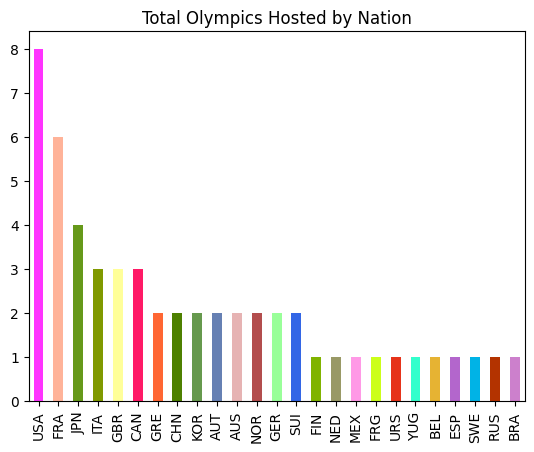

In [6]:
# which countries have hosted the most games?
unique_host_countries = hosts_df['noc'].unique()
unique_host_regions = hosts_df['region'].unique()

unique_country_code = hosts_df['noc'].unique()
color_code = [
    "#FF6633", "#FFB399", "#FF33FF", "#FFFF99", "#00B3E6", 
    "#E6B333", "#3366E6", "#999966", "#99FF99", "#B34D4D", 
    "#80B300", "#809900", "#E6B3B3", "#6680B3", "#66991A", 
    "#FF99E6", "#CCFF1A", "#FF1A66", "#E6331A", "#33FFCC", 
    "#66994D", "#B366CC", "#4D8000", "#B33300", "#CC80CC", 
    "#66664D", "#991AFF", "#E666FF", "#4DB3FF", "#1AB399", 
    "#E666B3", "#33991A", "#CC9999", "#B3B31A", "#00E680", 
    "#4D8066", "#809980", "#E6FF80", "#1AFF33", "#999933", 
    "#FF3380", "#CCCC00", "#66E64D", "#4D80CC", "#9900B3", 
    "#E64D66", "#4DB380", "#FF4D4D", "#99E6E6", "#6666FF",
    "#003366", "#663399", "#FF6666", "#66CCFF", "#669999",
    "#FF9966", "#66FF33", "#CC3333", "#FFCC00", "#336666",
    "#33CCCC", "#99CC33", "#FF66CC", "#99CCCC", "#996699",
    "#FF99CC", "#CCCC99", "#9999CC", "#33CC66", "#FF6666",
    "#3366FF", "#9999FF", "#666633", "#CC9966", "#663333",
    "#3399FF", "#FF9966", "#FF6699", "#33FF99", "#6699FF",
    "#9966FF", "#FF9966", "#669933", "#99FF66", "#33FFCC",
    "#9933FF", "#99FFCC", "#33CCFF", "#9966CC", "#FF9933",
    "#66FF99", "#FFCC99", "#99CCFF", "#996633"
]
color_dict = {}
for index,code in enumerate (unique_country_code):
    color_dict[code] = color_code[index]


plot_df = pd.DataFrame()
region_plot_df = pd.DataFrame()

noc_df.set_index('country', drop=True, inplace=True)
for host in unique_host_countries:
    plot_df.loc[host, 'Olympics Hosted'] = len(hosts_df[hosts_df['noc'] == host]) 

for host in unique_host_regions:
    region_plot_df.loc[host, 'Olympics Hosted'] = len(hosts_df[hosts_df['region'] == host])

plot_df['color'] = plot_df.index.map(color_dict)

plot_df.sort_values('Olympics Hosted', ascending=False, inplace=True)
region_plot_df.sort_values('Olympics Hosted', ascending=False, inplace=True)
plot_df['Olympics Hosted'].plot.bar(legend=False, title='Total Olympics Hosted by Nation', color=plot_df['color'])


50.0 % of all modern Olympics were hosted by 6 countries:


<Axes: title={'center': 'Most Frequent Host Nations'}>

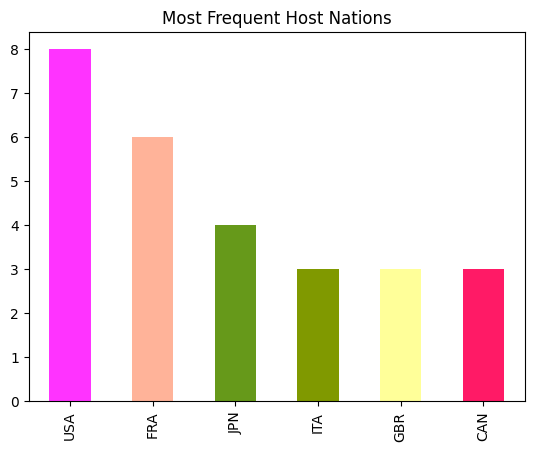

In [7]:
print(plot_df.iloc[0:6, 0].sum()/plot_df['Olympics Hosted'].sum()*100, '% of all modern Olympics were hosted by 6 countries:')
plot_df.iloc[0:6, 0].plot.bar(legend=False, title='Most Frequent Host Nations',  color=plot_df['color'])

Half of all modern Olympics were hosted by these 6 countries: USA, France, Japan, Italy, Great Britain and Canada. For the plot to be meaningful, we need to focus on one country at a time, and one season (either Summer or Winter games). Therefore, the analysis will focus on these 6 nations. 

With 57.407407407407405 % in Europe:


<Axes: title={'center': 'Olympics Hosted by Continent'}>

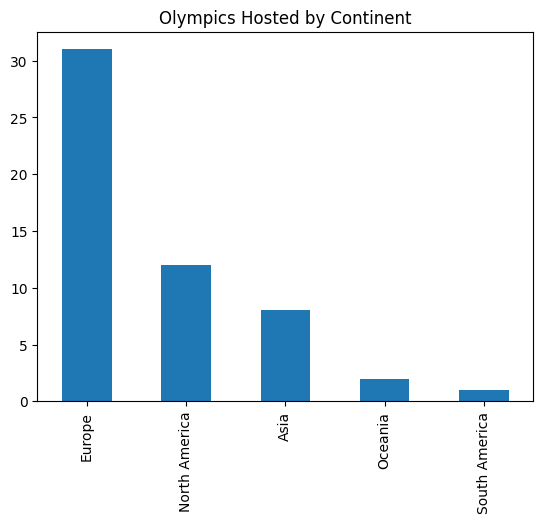

In [8]:
print('With', region_plot_df.loc['Europe', 'Olympics Hosted']/region_plot_df['Olympics Hosted'].sum()*100, '% in Europe:')
region_plot_df.plot.bar(legend=False, title='Olympics Hosted by Continent')

It is also notable that more than half (57.4%) of all modern games were hosted in Europe.

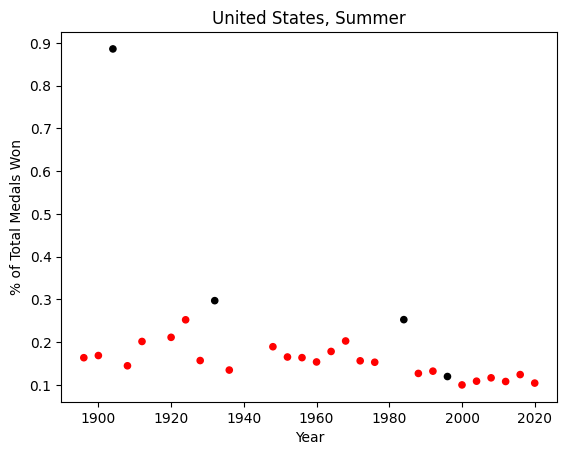

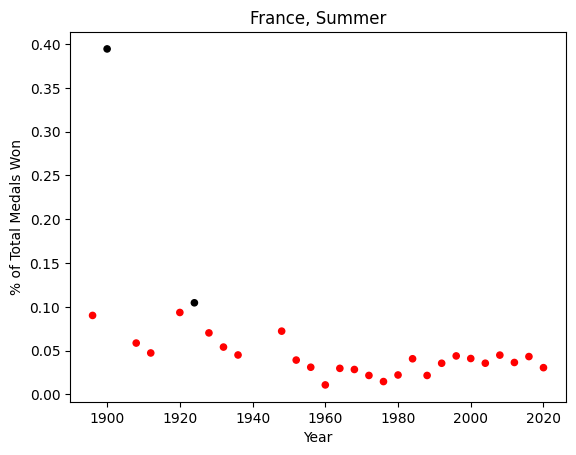

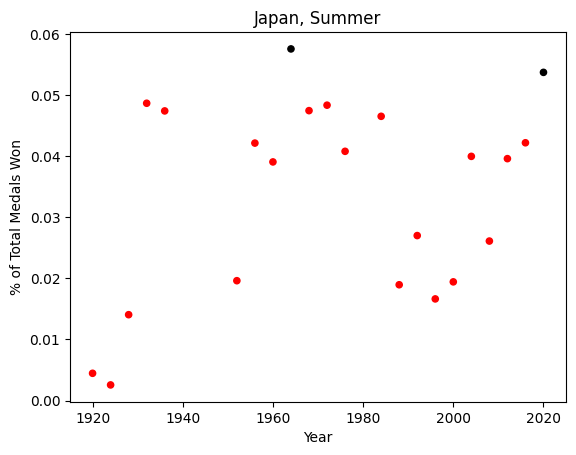

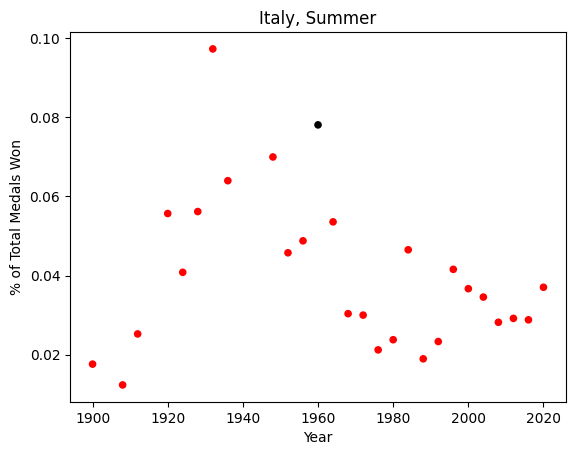

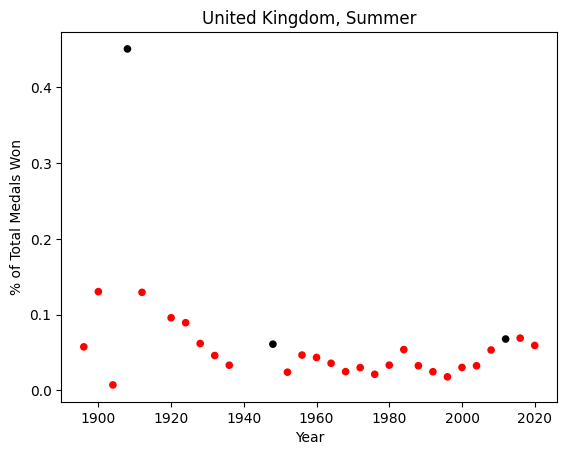

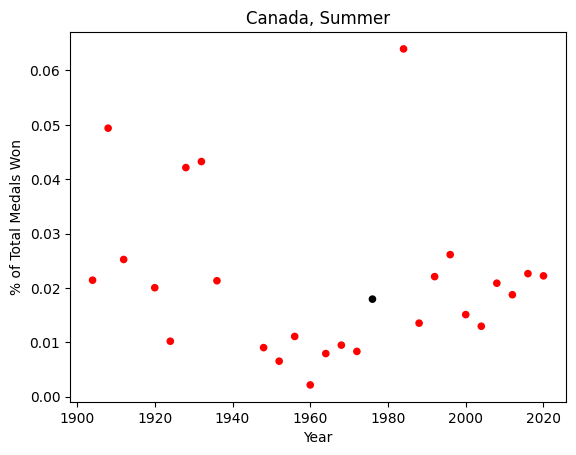

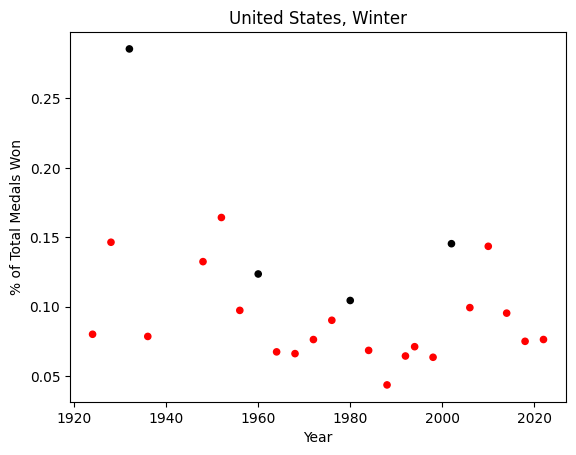

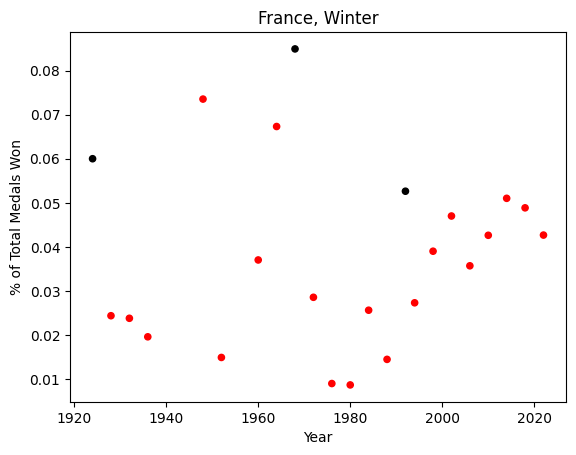

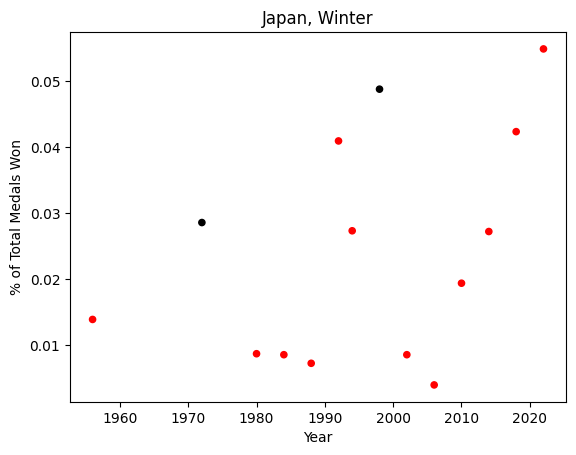

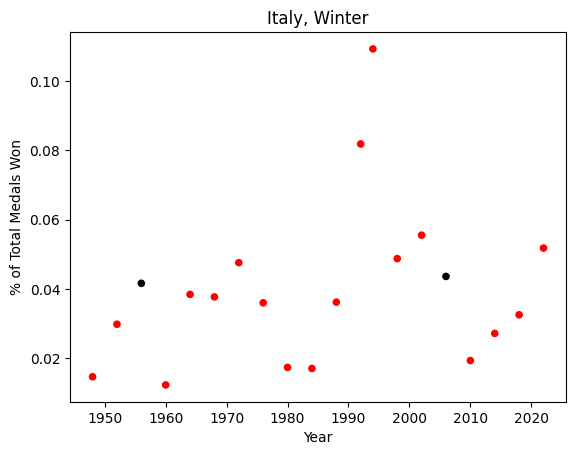

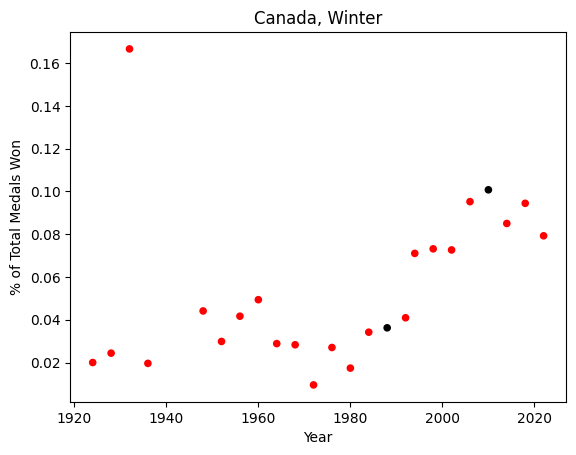

In [9]:
# plotting medal counts of the 6 countries that have hosted the olympics 3 or more times:

host_countries = ['United States', 'France', 'Japan', 'Italy', 'United Kingdom', 'Canada']
medals_df = pd.read_csv('medals.csv') # merge this with the host countries
medals_df = pd.merge(left=medals_df, right=hosts_df, on=['year', 'season'], how='left')


medals_df.replace('Great Britain', 'United Kingdom', inplace=True)
medals_df.replace("People's Republic of China", 'China', inplace=True)
medals_df.replace('Republic of Korea', 'South Korea', inplace=True)
medals_df.replace('Russian Federation', 'Russia', inplace=True)
medals_df['host'] = 1*(medals_df['country_x'] == medals_df['country_y'])
medals_df.rename({'country_x': 'country', 'noc_x': 'noc'}, inplace=True)

for season in ['Summer', 'Winter']:
    scatter_df = medals_df[medals_df['season'] == season]

    for country in host_countries:
        # print(country)
        if country == 'United Kingdom' and season == 'Winter':
            continue # UK has never hosted in winter
        scatter_df[scatter_df['country_x'] == country].plot.scatter(x='year', y='percent_won', c='host', colormap='flag', xlabel='Year', ylabel='% of Total Medals Won', title=country + ', ' + season, colorbar=False)


It is clear from the scatterplots that, on average, during a **country's host years (in black)** the country tends to perform better than the years they **competed as a guest (in red)**. In these plots, the y-axis has been normalized to show the medals award to the country as a percentage of all medals awarded that year. This adjustment is necessary because increasingly more events have been added to the Olympics over time, and therefore more total medals are awarded. 

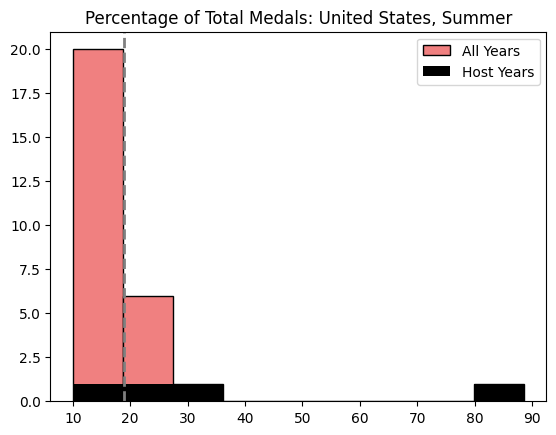

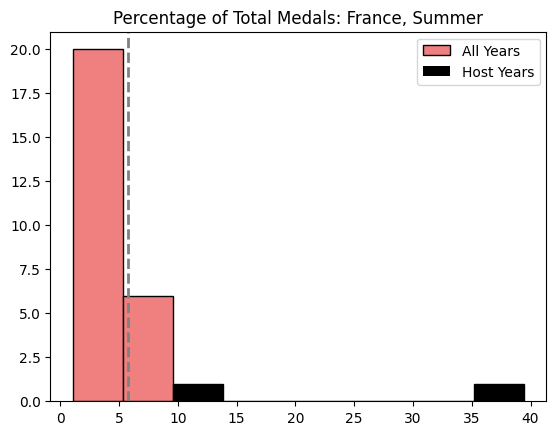

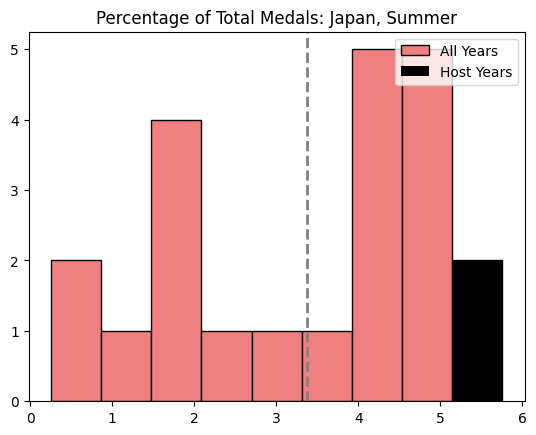

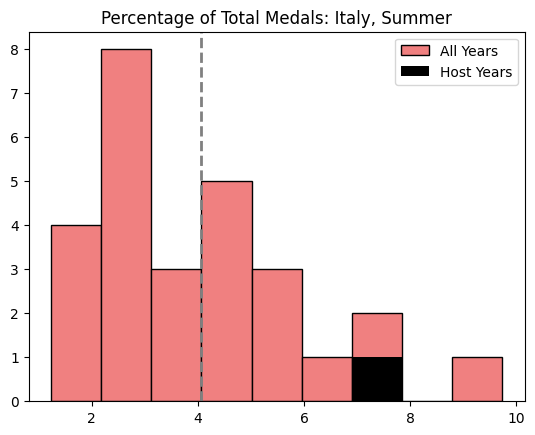

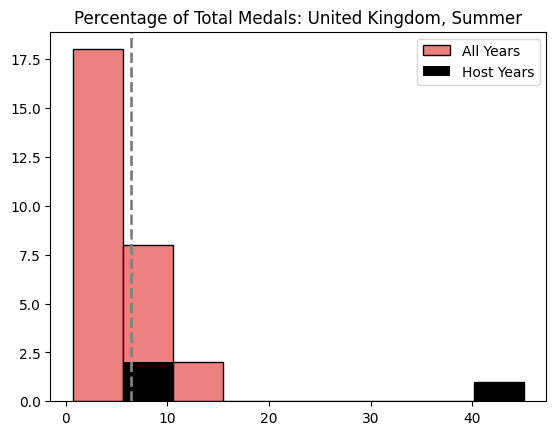

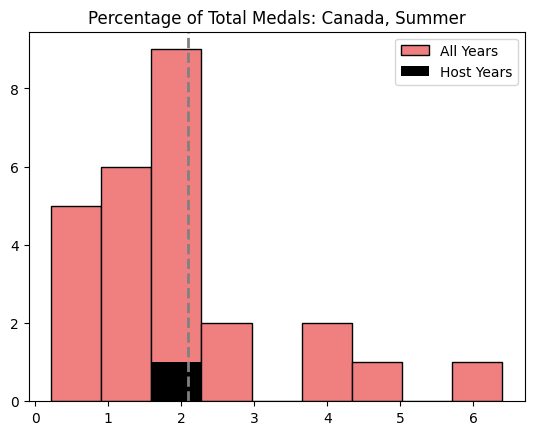

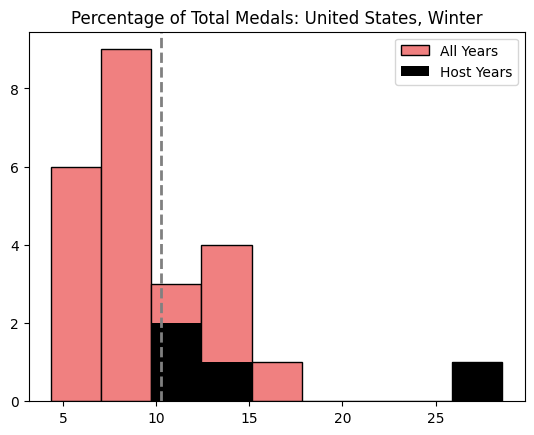

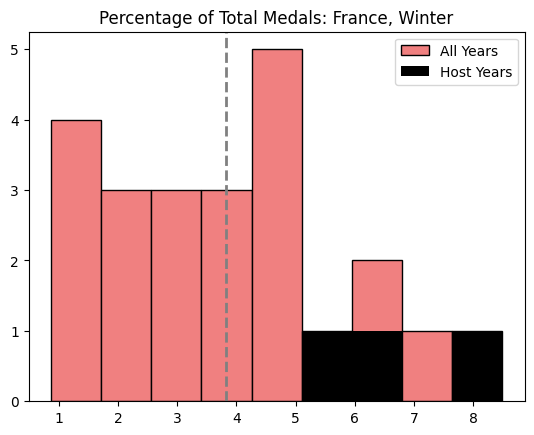

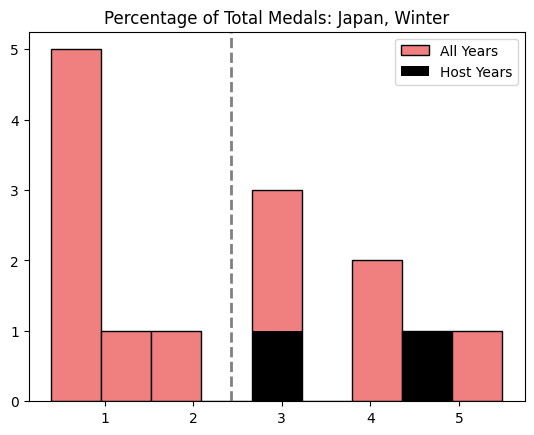

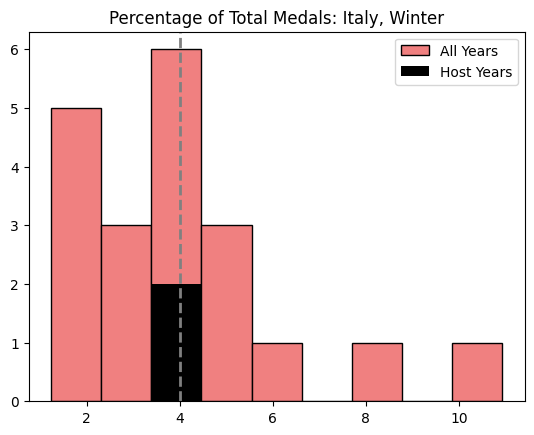

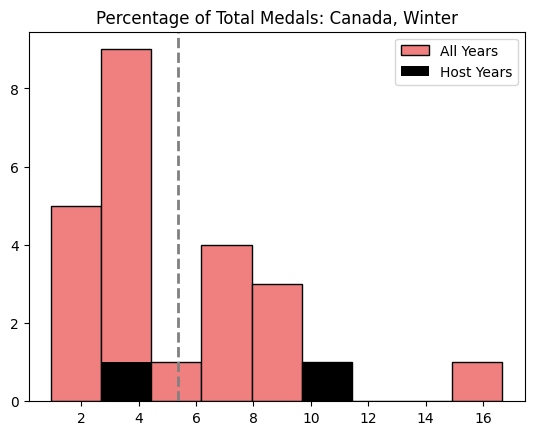

In [10]:
import matplotlib.pyplot as plt
import numpy as np

for season in ['Summer', 'Winter']:
    hist_df = medals_df[medals_df['season'] == season].copy()
    hist_df['percent_won'] *= 100
    hist_df['host'] = hist_df['noc_x'] == hist_df['noc_y']
    hist_df['Host Years'] = hist_df['percent_won'].where(hist_df['host'])
    for country in host_countries:
        if country == 'United Kingdom' and season == 'Winter':
            continue 
        
        plot_df = hist_df[hist_df['country_x'] == country]
        bins = np.linspace(plot_df['percent_won'].min(), plot_df['percent_won'].max(), 10)

        plt.hist(plot_df['percent_won'], bins, label='All Years', color='lightcoral', edgecolor='black')
        plt.hist(plot_df['Host Years'], bins, label='Host Years', color='black')
        plt.legend(loc='upper right')
        plt.axvline(plot_df['percent_won'].mean(), color='grey', linestyle='dashed', linewidth=2)
        plt.title(label='Percentage of Total Medals: '+ country + ', ' + season)
        plt.show()
        

The histogram plots show that in nearly every case, the hosting country wins more total medals during host years (as a percentage of all medals awarded) than the mean amount which they won over all competing years. Many factors could contribute to this, including:

**Increased investment**: It is common for the host country to make substantial investments in sporting infrastructure leading up to their host years. [https://en.wikipedia.org/wiki/Cost_of_the_Olympic_Games] This may lead to increased opportunities and resources for local athletes.

**Public Interest and Home Advantage**: The host country typically sees an increased number of viewers, both in-person and tuning in online or on TV. This may provide a psychological advantage to the country's athletes, who also get to compete in a more familiar environment.

**Additional competitors**: Generally, the host country fields more competing athletes than the same country in non-host years. This effect was even more significant in the very early years before commercial flight, when athletes would need to travel by boat to the games. However, even in more recent years, the cost of competing in one's own country tends to be much lower. This leads to increased turnout for the host nation.